# How many iterations are required to damp high wavenumber perturbations?

## Jacobi iterations

$$\psi_{ij}^{n+1} = (1 - \alpha) \psi_{ij}^n  + \frac{\alpha}{4} \left(\psi_{i-1,j}^n + \psi_{i+1,j}^n + \psi_{i,j-1}^n + \psi_{i,j+1}^n \right)$$

$\psi_{i,j}^{n+1}$ is the new iterate at cell location $i, j$
$\psi_{i,j}^{n}$ is the old iterate
$\alpha$ is a coefficient in the range $0 \cdots 1$. 

Note that $\alpha/4$ is a diffusion coefficient since we can reqwrite
$$\left(\psi_{i-1,j}^n + \psi_{i+1,j}^n + \psi_{i,j-1}^n + \psi_{i,j+1}^n \right) \approx \left(h^2 \nabla^2 + 4\right) \psi_{ij}^n$$ where $h$ is the cell size (same in x and y directions).
Hence,
$$\psi_{ij}^{n+1} \approx (1 - \alpha) \psi_{ij}^n + \frac{\alpha}{4}\left(h^2 \nabla^2 + 4\right) \psi_{ij}^2$$
or
$$\psi_{ij}^{n+1} \approx \left( 1 + \frac{\alpha}{4} h^2 \nabla^2 \right) \psi_{ij}^n.$$


## Amplification factor

Our aim is damp high frequency modes by applying Jacobi iterations multiple times. Using a von Neumann stability analysis where $\psi_{ij}^n \sim \exp i(k x + q y)$ one gets
$$\psi_{ij}^{n+1} = (1 - \alpha) \psi_{ij}^n + \frac{\alpha}{4} \left(e^{i k h} + e^{-i k h} + e^{i q h} + e^{-i q h} \right) \psi_{ij}^n$$. Dropping the $ij$ subscripts, one gets:
$$\psi^{n+1} = \left(1 - \alpha + \frac{\alpha}{2} \cos kh + \frac{\alpha}{2} \cos q h \right) \psi^n.$$
The amplification factor is:
$$A = 1 - \alpha + \frac{\alpha}{2} \cos kh + \frac{\alpha}{2} \cos q h.$$

At each iteration, the amplitudes $e^{ikx + i qy}$ are damped by a factor $A(k, q)$. 

## Example

Consider the case $q = 0$ and $k$ varying from 0, to $\pi/h$, the amplification factor for different values of $\alpha$ is:

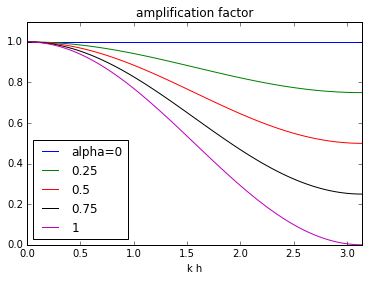

In [16]:
% matplotlib inline
from matplotlib import pylab
import numpy
kh = numpy.linspace(0., numpy.pi, 100)
qh = 0.0
colors = ('b', 'g', 'r', 'k', 'm', 'c')
legs = ('alpha=0', '0.25', '0.5', '0.75', '1')
i = 0
for alpha in numpy.linspace(0., 1., 5):
    a = 1 - alpha + 0.5*alpha * numpy.cos(kh)+ 0.5*alpha * numpy.cos(qh)
    pylab.plot(kh, a, colors[i] + '-')
    i += 1
pylab.axis([0, numpy.pi, 0, 1.1])
pylab.legend(legs, loc=3)
pylab.title('amplification factor')
pylab.xlabel('k h')
pylab.show()

We see that high wavenumbers are damped more strongly than low frequency modes and the damping is most effective for $\alpha = 1$.

## How to determine the number of iterations

Let's say we want to attenuate $kh = \pi/2, qh = 0$ by 99 percent using $N$ iterations, then:

$$A^N = (1 - \frac{\alpha}{2})^N = 0.01$$
or

In [17]:
alpha = 1
numpy.log(0.01)/numpy.log(alpha/2.)

6.6438561897747244

That is about 7 iterations.